Part 2: Qualitative Analysis
Create a presentation using Google Slides (max. 5 slides) using the data above (and additional data from those tables) that make clear recommendations on how people can create a successful Kickstarter campaign.

* **What's the best length of time to run a campaign?**

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
from tools.helpers import read_json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 6]

In [183]:
in_csv = 'data/input/DSI_kickstarterscrape_dataset.csv'

In [184]:
df = pd.read_csv(in_csv, encoding="ISO-8859-1")
# if need to convert back to utf-8 https://stackoverflow.com/questions/42456867/convert-pandas-dataframe-to-utf8

df = df.rename(columns=lambda x: x.replace(' ', '_'))
df['uid'] = df.index + 1

In [229]:
colors = {'failed': 'red', 'live': 'grey', 'canceled': 'orange', 'suspended': 'yellow', 'successful': 'dodgerblue'}

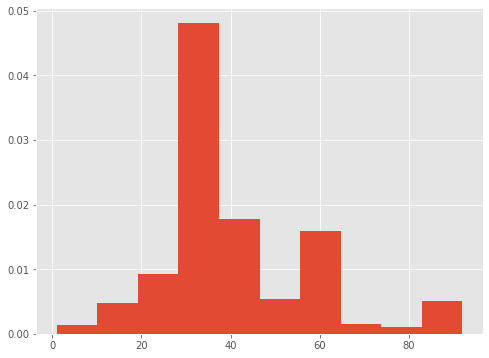

In [230]:
# df.duration.hist(histtype='bar', density=True, stacked=True, colors=df['status'].apply(lambda x: colors[x]))  # color=colors, label=colors,

df.duration.hist(density=True, histtype='bar')# , color=colors, label=colors)

In [231]:
# filter outliers
from scipy import stats

dfs = df[['uid', 'funded_percentage']]

dff = dfs[(np.abs(stats.zscore(dfs)) < 3).all(axis=1)]

In [232]:
dff

,uid,funded_percentage
0,1,1.099524
1,2,0.005000
2,3,0.002800
3,4,1.089167
4,5,0.000000
...,...,...
45952,45953,1.202000
45953,45954,0.007500
45954,45955,1.000000
45955,45956,0.085695


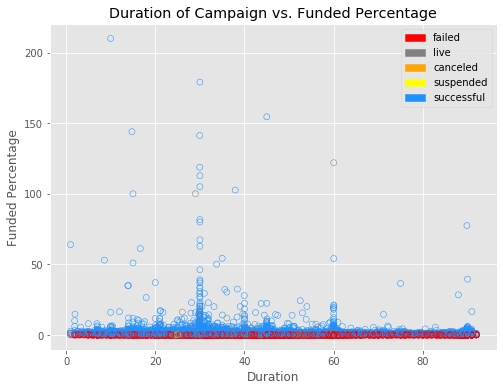

In [233]:
import matplotlib.patches as mpatches

dfm = dff.merge(df.drop('funded_percentage', axis=1), how='left', on='uid')

plt.title('Duration of Campaign vs. Funded Percentage') #, fontsize=18)
plt.xlabel('Duration') #, fontsize=18)
plt.ylabel('Funded Percentage') #, fontsize=16)

patchList = []
for key in colors:
        data_key = mpatches.Patch(color=colors[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)

plt.scatter(dfm.duration, dfm.funded_percentage, facecolors='none', edgecolors=dfm['status'].apply(lambda x: colors[x]))  # s=dfm.funded_percentage, 

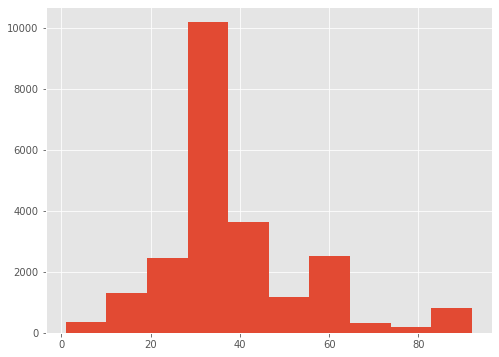

In [234]:
dfms = dfm[(dfm.status == 'successful')]

dfms.duration.hist()

In [235]:
dfmu = dfm[(dfm.status != 'successful') & (dfm.status != 'live')]

print(len(dfmu.index))

19059


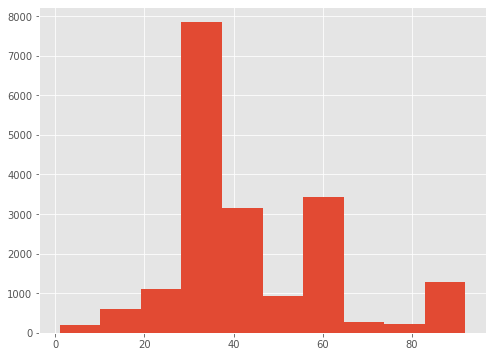

In [236]:
dfmu.duration.hist()

Text(52, 5000, 'Suggested Day Limit')

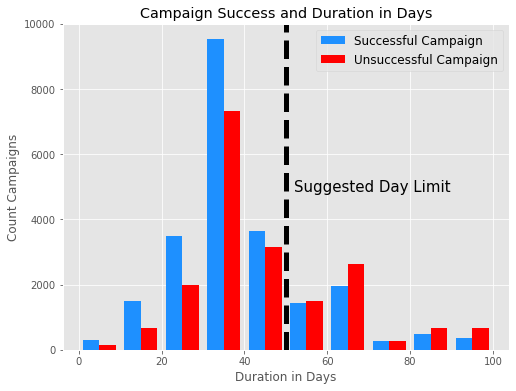

In [242]:
# Make a separate list for each airline
# x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
# x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
# x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
# x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
# x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

x1 = list(dfms.duration)
x2 = list(dfmu.duration)


# Assign colors for each airline and the names
colors = ['dodgerblue', 'red'] #, '#F0E442', '#009E73', '#D55E00']

# Plot formatting
plt.xlabel('Duration in Days')
plt.ylabel('Count Campaigns')
plt.title('Campaign Success and Duration in Days')


plt.hist(
    [x1, x2], 
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
    density=False,
    color = colors,
    # labels=['masdfadsfds', 'sasdfdass'],
    
)
plt.legend(labels=['Successful Campaign', 'Unsuccessful Campaign'], fontsize=12)
plt.axvline(x=50, color='black', linestyle='--', linewidth=5)
plt.text(
    52, 5000, 
    'Suggested Day Limit', 
    horizontalalignment='left',
    verticalalignment='center',
    fontsize=15
)

In [246]:
df30 = df[(df.duration >= 50) & (df.duration < 60)]


dfgt = df30.groupby(['status']).count()

In [247]:
dfgt

,project_id,name,url,category,subcategory,location,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration,uid
status,,,,,,,,,,,,,,,,,
canceled,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
failed,1508,1508,1508,1508,1508,1432,1508,1508,1508,1508,1508,1508,1506,1508,1508,1508,1508
live,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203
successful,1430,1430,1430,1430,1430,1384,1430,1430,1430,1430,1430,1430,1428,1430,1430,1430,1430


In [250]:
df.groupby('status').count()

,project_id,name,url,category,subcategory,location,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration,uid
status,,,,,,,,,,,,,,,,,
canceled,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
failed,18996,18996,18996,18996,18996,18304,18996,18996,18996,18996,18996,18996,18957,18996,18996,18996,18996
live,3929,3929,3929,3929,3929,3929,3929,3917,3929,3929,3929,3929,3929,3929,3929,3929,3929
successful,22969,22969,22969,22969,22969,22339,22969,22969,22969,22969,22969,22969,22949,22969,22969,22969,22969
suspended,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
